#  Influence line shear forces

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some influence lines!

![figuur 1](../data_influence_line_book/Structure_book.gif)

In [ ]:
import micropip
await micropip.install("ipympl")

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

%matplotlib widget

In [3]:
EI, x = sym.symbols('EI, x',real=True)

In [4]:
Bv, Cv, Cm = sym.symbols('Bv, Cv, Cm',real=True)
a, b, L1, L2 = sym.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

In [5]:
q = - Bv * sym.SingularityFunction(x,0,-1) - Cv * sym.SingularityFunction(x,L1,-1) + Cm * sym.SingularityFunction(x,L1,-2) + 1 * sym.SingularityFunction(x,a,-1)
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3
w = sym.integrate(phi,x)+C4
eq1 = sym.Eq(V.subs(x,-1),0)
eq2 = sym.Eq(M.subs(x,-1),0)
eq3 = sym.Eq(w.subs(x,0),0)
eq4 = sym.Eq(w.subs(x,L1),0)
eq5 = sym.Eq(phi.subs(x,L1),0)
eq6 = sym.Eq(M.subs(x,L1+1),0)
eq7 = sym.Eq(V.subs(x,L1+1),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Bv, Cv, Cm])
Bv_sol = sol[Bv].rewrite(sym.Piecewise)
Bv_numpy = sym.lambdify([L1,a,EI],Bv_sol)
Cv_sol = sol[Cv].rewrite(sym.Piecewise)
Cv_numpy = sym.lambdify([L1,a,EI],Cv_sol)
Cm_sol = sol[Cm].rewrite(sym.Piecewise)
Cm_numpy = sym.lambdify([L1,a,EI],Cm_sol)
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,10),(a,2.5),(EI,5000)])
V_numpy = sym.lambdify([L1,a,EI,x],V_sol.rewrite(sym.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,10),(a,2.5),(EI,5000)])
M_numpy = sym.lambdify([L1,a,EI,x],M_sol.rewrite(sym.Piecewise))

## Find V-line

Piecewise((0, x > 10), (oo, Eq(x, 10)), (-0.3671875, x > 2.5), (0.6328125, x > 0), (0, True))

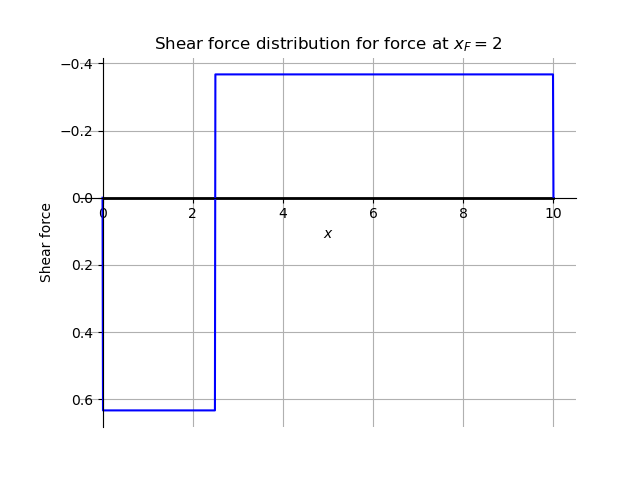

In [6]:
plt.figure()
display(sym.simplify(V_subs.rewrite(sym.Piecewise)))
x_plot = np.linspace(0,10.00001,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_numpy(L1=10,a=2.5,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Shear force distribution for force at $x_F =  2 $'
axs.set_title(title0);
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')
plt.show()

##  Finding influence line for V

Piecewise((x**3/2000 - 3*x/20 + 1, x > 2), (x*(x**2 - 300)/2000, True))

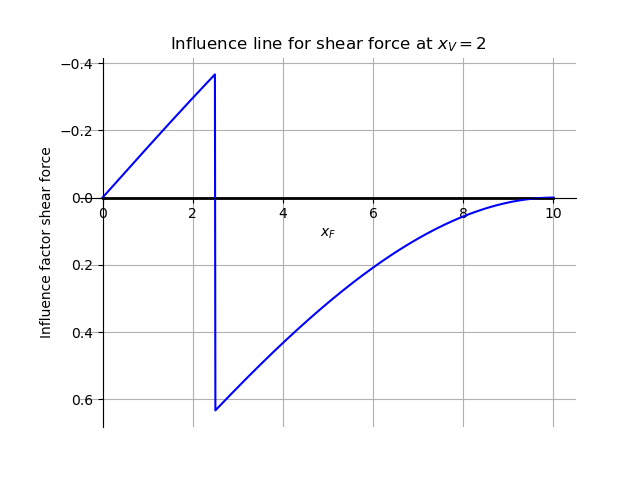

In [7]:
q = 0
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3 
w = sym.integrate(phi,x)+C4 + sym.SingularityFunction(x,a,0)
eq2 = sym.Eq(M.subs(x,0),0)
eq3 = sym.Eq(w.subs(x,0),0)
eq4 = sym.Eq(w.subs(x,L1),0)
eq5 = sym.Eq(phi.subs(x,L1),0)
sol = sym.solve([eq2,eq3,eq4,eq5],[C1,C2,C3,C4])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,10),(a,2),(EI,5000)])
display(sym.simplify(w_subs.rewrite(sym.Piecewise)))
V_inf_numpy = sym.lambdify([L1,a,EI,x],w_sol.rewrite(sym.Piecewise))



plt.figure()
x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L1=10,a=2.5,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 2$'
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')
axs.set_title(title0);
plt.show()

## Comparison V-line and influence line for shear force at $x = ...$ #

interactive(children=(FloatSlider(value=2.0, description='Location shear force x_V = ... (m)', layout=Layout(w…

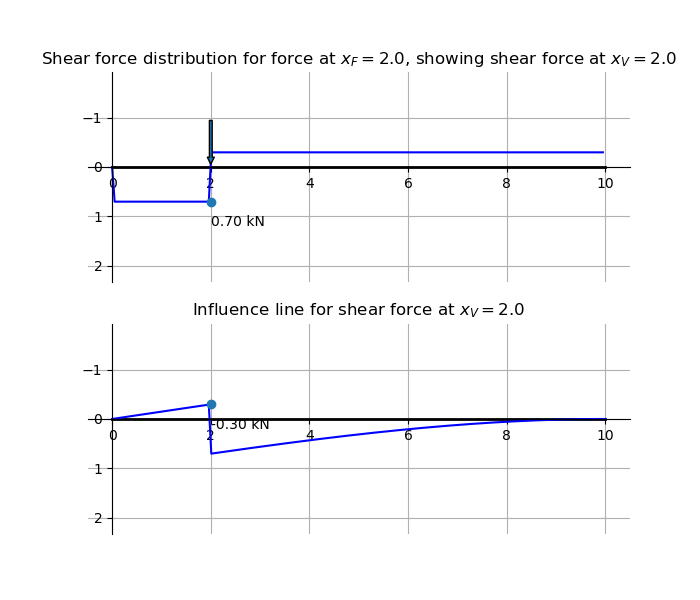

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))
x = np.linspace(0,10,200)
def func(a,b):
    axs[0].clear()  # Clear the existing plot
    axs[1].clear()
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,V_numpy(10,b,5000,x),color='blue')
    axs[0].plot(a,V_numpy(10,b,5000,a),marker='o')
    axs[0].annotate('%.2f kN' % V_numpy(10,b,5000,a),xy = [a,V_numpy(10,b,5000,a)+0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    title0 = 'Shear force distribution for force at $x_F = '+str(b)+'$, showing shear force at $x_V = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,V_inf_numpy(10,a,5000,x),color='blue')
    axs[1].plot(b,V_inf_numpy(10,a,5000,b),marker='o')
    axs[1].annotate('%.2f kN' % V_inf_numpy(10,a,5000,b),xy = [b,V_inf_numpy(10,a,5000,b)+0.5])
    axs[1].invert_yaxis()
    title1 = 'Influence line for shear force at $x_V = '+str(a)+'$'
    axs[1].set_title(title1)

    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_position('zero')
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_position('zero')
    plt.draw()  

    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.1, description="Location shear force x_V = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.1, description="Location unit load x_F = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );